In [50]:
import cv2
import os
from random import shuffle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TRAIN_PATH = '/Users/dmitriykhvan/github/kaggle/kaggle/datasets/cats_dogs/train'
TEST_PATH = '/Users/dmitriykhvan/github/kaggle/kaggle/datasets/cats_dogs/test'
CSV_PATH = '/Users/dmitriykhvan/github/kaggle/kaggle/submissions/output_1.csv'

IMG_SIZE = 64

def read_label(img_name,count):
    label = img_name.split('.')[-3]
    if label == 'dog':
        count.append(1)
        return 1
    elif label == 'cat':
        count.append(0)
        return 0
    
def read_data():
    training_data = []
    test_data = []
    count_lb = []
    for img in tqdm(os.listdir(TRAIN_PATH)):
        label = read_label(img,count_lb)
        path = os.path.join(TRAIN_PATH,img)
        img_data = cv2.imread(path, cv2.IMREAD_COLOR)
        img_data = cv2.resize(img_data, (IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_CUBIC)
        training_data.append([np.array(img_data), label])
    shuffle(training_data)
    
    for img in tqdm(os.listdir(TEST_PATH)):        
        path = os.path.join(TEST_PATH,img)
        img_data = cv2.imread(path, cv2.IMREAD_COLOR)
        img_data = cv2.resize(img_data, (IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_CUBIC)
        test_data.append(np.array(img_data))
        
    return training_data, test_data, count_lb

tr_data, test_data, lb_count = read_data()

100%|██████████| 12500/12500 [00:35<00:00, 352.26it/s]


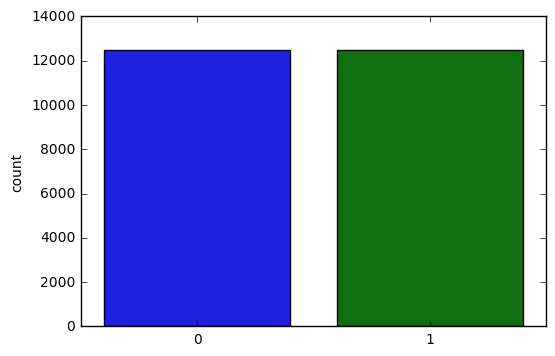

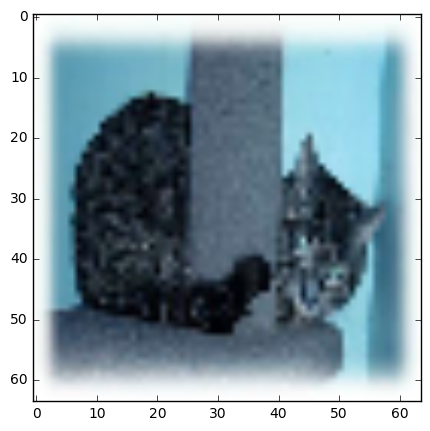

In [53]:
img_list = [tr_data[i][0] for i in range(len(tr_data))]
lb_list = [tr_data[i][1] for i in range(len(tr_data))]

img_arr = np.array(img_list)
test_arr = np.array(test_data)

lb_arr = np.array(lb_list)

plt.figure(figsize=(10,5))
plt.imshow(img_arr[0])
plt.show()

#print(lb_list)
sns.countplot(lb_list)

img_arr = img_arr / 255
test_arr = test_arr / 255

In [54]:
import keras
from keras import models
from keras import layers
import seaborn as sns

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               9437696   
__________

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(img_arr, lb_arr, epochs=5, batch_size=256)

Epoch 1/5
 8448/25000 [=========>....................] - ETA: 3:24 - loss: 0.6803 - acc: 0.5750

In [ ]:
preds = model.predict(test_arr, verbose = 1)
prediction = np.argmax(preds, axis=1)

out = open(, "w")
out.write("ImageId,Label\n")

rows = ['']*test.shape[0] # predefine or use append
for num in range(0, test.shape[0]):
    label = 0 #TODO; classify here
    rows[num] = "%d,%d\n"%(num+1,label)

out.writelines(rows)
out.close()